<a href="https://colab.research.google.com/github/salsaadityani/sentiment-analysis-svm/blob/main/svm-lda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Sastrawi
!pip install swifter
!pip install pyLDAvis

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('datacovid.csv')
# df = df[['Isi']]
df.head()

,tweet,klasifikasi
0,"Waspada COVID-19 Melandai,\nWaspada Tukang Jua...",neutral
1,"Sudah vaksin dosis 2, kenapa harus rest pcr un...",neutral
2,Yang tidak percaya covid tpi tetap ngikutin pr...,neutral
3,Berita \ntahun 2020: penuh dengan terpapar pen...,positive
4,"Yg satu pengen nguasai mars, yg satu lg pengen...",positive


In [ ]:
df.shape

(8577, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8577 entries, 0 to 8576
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet        8577 non-null   object
 1   klasifikasi  8577 non-null   object
dtypes: object(2)
memory usage: 134.1+ KB


Text(0.5, 0, 'Label')

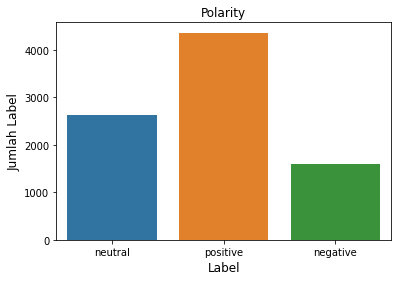

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='klasifikasi', data=df)
plt.title('Polarity')
plt.ylabel('Jumlah Label', fontsize=12)
plt.xlabel('Label', fontsize=12)

In [ ]:
df['klasifikasi'].value_counts()

positive    4359
neutral     2620
negative    1598
Name: klasifikasi, dtype: int64

# PRE-PROCESSING

In [ ]:
df = df.dropna()
df.shape

(8577, 2)

## Data Cleaning

In [ ]:
import string
import re #regex library

def remove_ulasan_special(text):
  #menghapus tab, new line, dan back slice
  text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
  #menghapus non ASCII (emoticon, chinese word, .etc)
  text = text.encode('ascii', 'replace').decode('ascii')
  #menghapus mention, link, hashtag
  text = ' '.join(re.sub("([@#][A-Zaz09]+)|(\w+:\/\/\S+)"," ",text).split())
  #menghapus incomplete URL
  return text.replace("http://", " ").replace("https://", " ")

#menghapus angka
def remove_number(text):
  return re.sub(r"\d+", "", text)

#menghapus tanda baca
def remove_punctuation(text):
  return text.translate(str.maketrans("","",string.punctuation))

#menghapus huruf tunggal (tidak berbentuk kata)
def remove_singl_char(text):
  return re.sub(r"\b[a-zA-Z]\b", "", text)

df['Isi_clean'] = df['tweet'].apply(remove_ulasan_special)
df['Isi_clean'] = df['Isi_clean'].apply(remove_number)
df['Isi_clean'] = df['Isi_clean'].apply(remove_punctuation)
df['Isi_clean'] = df['Isi_clean'].apply(remove_singl_char)

df = df[['klasifikasi','tweet','Isi_clean']]

df.head()

<input>:10: DeprecationWarning: invalid escape sequence \w
<input>:10: DeprecationWarning: invalid escape sequence \w
<input>:10: DeprecationWarning: invalid escape sequence \w
<input>:10: DeprecationWarning: invalid escape sequence \w
<input>:10: DeprecationWarning: invalid escape sequence \w
<input>:10: DeprecationWarning: invalid escape sequence \w
<input>:10: DeprecationWarning: invalid escape sequence \w
<input>:10: DeprecationWarning: invalid escape sequence \w
<input>:10: DeprecationWarning: invalid escape sequence \w
<input>:10: DeprecationWarning: invalid escape sequence \w
<input>:10: DeprecationWarning: invalid escape sequence \w
<input>:10: DeprecationWarning: invalid escape sequence \w
<input>:10: DeprecationWarning: invalid escape sequence \w
<input>:10: DeprecationWarning: invalid escape sequence \w
<input>:10: DeprecationWarning: invalid escape sequence \w
<input>:10: DeprecationWarning: invalid escape sequence \w
<input>:10: DeprecationWarning: invalid escape sequence 

,klasifikasi,tweet,Isi_clean
0,neutral,"Waspada COVID-19 Melandai,\nWaspada Tukang Jua...",Waspada COVID Melandai Waspada Tukang Jualan V...
1,neutral,"Sudah vaksin dosis 2, kenapa harus rest pcr un...",Sudah vaksin dosis kenapa harus rest pcr untu...
2,neutral,Yang tidak percaya covid tpi tetap ngikutin pr...,Yang tidak percaya covid tpi tetap ngikutin pr...
3,positive,Berita \ntahun 2020: penuh dengan terpapar pen...,Berita tahun penuh dengan terpapar penyakit t...
4,positive,"Yg satu pengen nguasai mars, yg satu lg pengen...",Yg satu pengen nguasai mars yg satu lg pengen ...


In [ ]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

df['Isi_clean'] = df['Isi_clean'].apply(deEmojify)
df.head()

,klasifikasi,tweet,Isi_clean
0,neutral,"Waspada COVID-19 Melandai,\nWaspada Tukang Jua...",Waspada COVID Melandai Waspada Tukang Jualan V...
1,neutral,"Sudah vaksin dosis 2, kenapa harus rest pcr un...",Sudah vaksin dosis kenapa harus rest pcr untu...
2,neutral,Yang tidak percaya covid tpi tetap ngikutin pr...,Yang tidak percaya covid tpi tetap ngikutin pr...
3,positive,Berita \ntahun 2020: penuh dengan terpapar pen...,Berita tahun penuh dengan terpapar penyakit t...
4,positive,"Yg satu pengen nguasai mars, yg satu lg pengen...",Yg satu pengen nguasai mars yg satu lg pengen ...


## Case Folding

In [ ]:
#mengubah semua huruf dalam dokumen menjadi huruf kecil
df['Isi_lower'] = df['Isi_clean'].str.lower()
df.head()

,klasifikasi,tweet,Isi_clean,Isi_lower
0,neutral,"Waspada COVID-19 Melandai,\nWaspada Tukang Jua...",Waspada COVID Melandai Waspada Tukang Jualan V...,waspada covid melandai waspada tukang jualan v...
1,neutral,"Sudah vaksin dosis 2, kenapa harus rest pcr un...",Sudah vaksin dosis kenapa harus rest pcr untu...,sudah vaksin dosis kenapa harus rest pcr untu...
2,neutral,Yang tidak percaya covid tpi tetap ngikutin pr...,Yang tidak percaya covid tpi tetap ngikutin pr...,yang tidak percaya covid tpi tetap ngikutin pr...
3,positive,Berita \ntahun 2020: penuh dengan terpapar pen...,Berita tahun penuh dengan terpapar penyakit t...,berita tahun penuh dengan terpapar penyakit t...
4,positive,"Yg satu pengen nguasai mars, yg satu lg pengen...",Yg satu pengen nguasai mars yg satu lg pengen ...,yg satu pengen nguasai mars yg satu lg pengen ...


## Tokenizing

In [ ]:
#pemisahan teks menjadi potongan-potongan kata yang disebut sebagai token
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

#NLTK word tokenize
def word_tokenize_wrapper(text):
  return word_tokenize(text)

df['Isi_token'] = df['Isi_lower'].apply(word_tokenize_wrapper)

df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,klasifikasi,tweet,Isi_clean,Isi_lower,Isi_token
0,neutral,"Waspada COVID-19 Melandai,\nWaspada Tukang Jua...",Waspada COVID Melandai Waspada Tukang Jualan V...,waspada covid melandai waspada tukang jualan v...,"[waspada, covid, melandai, waspada, tukang, ju..."
1,neutral,"Sudah vaksin dosis 2, kenapa harus rest pcr un...",Sudah vaksin dosis kenapa harus rest pcr untu...,sudah vaksin dosis kenapa harus rest pcr untu...,"[sudah, vaksin, dosis, kenapa, harus, rest, pc..."
2,neutral,Yang tidak percaya covid tpi tetap ngikutin pr...,Yang tidak percaya covid tpi tetap ngikutin pr...,yang tidak percaya covid tpi tetap ngikutin pr...,"[yang, tidak, percaya, covid, tpi, tetap, ngik..."
3,positive,Berita \ntahun 2020: penuh dengan terpapar pen...,Berita tahun penuh dengan terpapar penyakit t...,berita tahun penuh dengan terpapar penyakit t...,"[berita, tahun, penuh, dengan, terpapar, penya..."
4,positive,"Yg satu pengen nguasai mars, yg satu lg pengen...",Yg satu pengen nguasai mars yg satu lg pengen ...,yg satu pengen nguasai mars yg satu lg pengen ...,"[yg, satu, pengen, nguasai, mars, yg, satu, lg..."


## Normalization

In [ ]:
normalized_word = pd.read_csv("normalisasi.csv")

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

df['Isi_normalized'] = df['Isi_token'].apply(normalized_term)

df.head(10)

,klasifikasi,tweet,Isi_clean,Isi_lower,Isi_token,Isi_normalized
0,neutral,"Waspada COVID-19 Melandai,\nWaspada Tukang Jua...",Waspada COVID Melandai Waspada Tukang Jualan V...,waspada covid melandai waspada tukang jualan v...,"[waspada, covid, melandai, waspada, tukang, ju...","[waspada, covid, melandai, waspada, tukang, ju..."
1,neutral,"Sudah vaksin dosis 2, kenapa harus rest pcr un...",Sudah vaksin dosis kenapa harus rest pcr untu...,sudah vaksin dosis kenapa harus rest pcr untu...,"[sudah, vaksin, dosis, kenapa, harus, rest, pc...","[sudah, vaksin, dosis, kenapa, harus, rest, pc..."
2,neutral,Yang tidak percaya covid tpi tetap ngikutin pr...,Yang tidak percaya covid tpi tetap ngikutin pr...,yang tidak percaya covid tpi tetap ngikutin pr...,"[yang, tidak, percaya, covid, tpi, tetap, ngik...","[yang, tidak, percaya, covid, tapi, tetap, ngi..."
3,positive,Berita \ntahun 2020: penuh dengan terpapar pen...,Berita tahun penuh dengan terpapar penyakit t...,berita tahun penuh dengan terpapar penyakit t...,"[berita, tahun, penuh, dengan, terpapar, penya...","[berita, tahun, penuh, dengan, terpapar, penya..."
4,positive,"Yg satu pengen nguasai mars, yg satu lg pengen...",Yg satu pengen nguasai mars yg satu lg pengen ...,yg satu pengen nguasai mars yg satu lg pengen ...,"[yg, satu, pengen, nguasai, mars, yg, satu, lg...","[yang, satu, ingin, nguasai, mars, yang, satu,..."
5,positive,Kamu gak bosen kah begini terus ? Tolong cepat...,Kamu gak bosen kah begini terus Tolong cepatl...,kamu gak bosen kah begini terus tolong cepatl...,"[kamu, gak, bosen, kah, begini, terus, tolong,...","[kamu, tidak, bosen, kah, begini, terus, tolon..."
6,negative,percaya covid itu tidak ada dan menolak vaksin...,percaya covid itu tidak ada dan menolak vaksin...,percaya covid itu tidak ada dan menolak vaksin...,"[percaya, covid, itu, tidak, ada, dan, menolak...","[percaya, covid, itu, tidak, ada, dan, tolak, ..."
7,neutral,"Kalo PPKM Diperpanjang, apakah cicilan KPR, KK...",Kalo PPKM Diperpanjang apakah cicilan KPR KKB ...,kalo ppkm diperpanjang apakah cicilan kpr kkb ...,"[kalo, ppkm, diperpanjang, apakah, cicilan, kp...","[kalau, ppkm, diperpanjang, apakah, cicilan, k..."
8,positive,Heran ya sama org2 yg mengelu2kan angka kesemb...,Heran ya sama org yg mengelukan angka kesembuh...,heran ya sama org yg mengelukan angka kesembuh...,"[heran, ya, sama, org, yg, mengelukan, angka, ...","[heran, iya, sama, orang, yang, mengelukan, an..."
9,positive,"Dapat kabar Silih berganti dari kampung,\n\nDa...",Dapat kabar Silih berganti dari kampung Dari s...,dapat kabar silih berganti dari kampung dari s...,"[dapat, kabar, silih, berganti, dari, kampung,...","[dapat, kabar, silih, berganti, dari, kampung,..."


## Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df['Isi_normalized']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['Isi_stemmed'] = df['Isi_normalized'].swifter.apply(get_stemmed_term)

df[['Isi_normalized','Isi_stemmed']].head(10)

Streaming output truncated to the last 5000 lines.
whoever : whoever
has : has
donorplasma : donorplasma
thalasemia : thalasemia
donordarah : donordarah
bekasihits : bekasihits
memahami : paham
mewujudkan : wujud
gotongroyong : gotongroyong
kehidupannya : hidup
otongroyongsemuatertolong : otongroyongsemuatertolong
menjangkau : jangkau
pedesaan : desa
singkat : singkat
menghadapinya : hadap
timorleste : timorleste
kemerdekaan : merdeka
wujud : wujud
ridho : ridho
slank : slank
luna : luna
dhani : dhani
dewa : dewa
ivan : ivan
elebjugabelanegara : elebjugabelanegara
nggur : nggur
juara : juara
utri : utri
berhubung : hubung
diperingati : ingat
aparatur : aparatur
perlombaan : lomba
memeriahkannya : riah
kelahiranku : lahir
kesatuan : satu
terbukalah : buka
irgahayurepublikindonesia : irgahayurepublikindonesia
obatditkuh : obatditkuh
bergotong : gotong
bergandengan : gandeng
menyambut : sambut
teiring : teiring
hut : hut
ndonesiatangguh : ndonesiatangguh
ndonesiajanganmenangis : ndonesiaj

Pandas Apply:   0%|          | 0/8577 [00:00<?, ?it/s]

,Isi_normalized,Isi_stemmed
0,"[waspada, covid, melandai, waspada, tukang, ju...","[waspada, covid, landai, waspada, tukang, jual..."
1,"[sudah, vaksin, dosis, kenapa, harus, rest, pc...","[sudah, vaksin, dosis, kenapa, harus, rest, pc..."
2,"[yang, tidak, percaya, covid, tapi, tetap, ngi...","[yang, tidak, percaya, covid, tapi, tetap, ngi..."
3,"[berita, tahun, penuh, dengan, terpapar, penya...","[berita, tahun, penuh, dengan, papar, sakit, t..."
4,"[yang, satu, ingin, nguasai, mars, yang, satu,...","[yang, satu, ingin, nguasai, mars, yang, satu,..."
5,"[kamu, tidak, bosen, kah, begini, terus, tolon...","[kamu, tidak, bosen, kah, begini, terus, tolon..."
6,"[percaya, covid, itu, tidak, ada, dan, tolak, ...","[percaya, covid, itu, tidak, ada, dan, tolak, ..."
7,"[kalau, ppkm, diperpanjang, apakah, cicilan, k...","[kalau, ppkm, panjang, apakah, cicil, kpr, kkb..."
8,"[heran, iya, sama, orang, yang, mengelukan, an...","[heran, iya, sama, orang, yang, elu, angka, se..."
9,"[dapat, kabar, silih, berganti, dari, kampung,...","[dapat, kabar, silih, ganti, dari, kampung, da..."


## Remove Stopwords

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_factory = StopWordRemoverFactory()

more_stopword = ['yg', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo',
                 'kalo', 'amp', 'biar', 'bikin', 'bilang',
                 'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                 'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                 'jd', 'jgn', 'sdh', 'aja', 'hehe', 'pen', 'nan', 'loh',
                 '&amp', 'yah', 'sama', 'see', 'translation']
# get stopword english
eng_stopwords = stopwords.words('english')
ind_stopwords = stopwords.words('indonesian')

listsw = stop_factory.get_stop_words()+more_stopword+eng_stopwords+ind_stopwords
# stopword = stop_factory.create_stop_word_remover()

len(listsw)

list_stopwords = set(listsw)

def stopwords_removal(words):
     return [word for word in words if word not in list_stopwords]

df['Isi_stopword'] = df['Isi_stemmed'].apply(stopwords_removal)

df[['Isi_stemmed','Isi_stopword']].head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Isi_stemmed,Isi_stopword
0,"[waspada, covid, landai, waspada, tukang, jual...","[waspada, covid, landai, waspada, tukang, jual..."
1,"[sudah, vaksin, dosis, kenapa, harus, rest, pc...","[vaksin, dosis, rest, pcr, syarat, terbang, ol..."
2,"[yang, tidak, percaya, covid, tapi, tetap, ngi...","[percaya, covid, ngikutin, protokol, sehat, se..."
3,"[berita, tahun, penuh, dengan, papar, sakit, t...","[berita, penuh, papar, sakit, papar, virus, lo..."
4,"[yang, satu, ingin, nguasai, mars, yang, satu,...","[nguasai, mars, tour, angkasa, indonesia, sibu..."
5,"[kamu, tidak, bosen, kah, begini, terus, tolon...","[bosen, cepat, pergi, ovid, indonesia]"
6,"[percaya, covid, itu, tidak, ada, dan, tolak, ...","[percaya, covid, tolak, vaksin, urus, pengaruh..."
7,"[kalau, ppkm, panjang, apakah, cicil, kpr, kkb...","[ppkm, cicil, kpr, kkb, kartu, kredit, tunda, ..."
8,"[heran, iya, sama, orang, yang, elu, angka, se...","[heran, iya, orang, elu, angka, sembuh, covid,..."
9,"[dapat, kabar, silih, ganti, dari, kampung, da...","[kabar, silih, ganti, kampung, saudara, jauhme..."


In [ ]:
import re
def untokenize(words):
    """
    Untokenizing a text undoes the tokenizing operation, restoring
    punctuation and spaces to the places that people expect them to be.
    Ideally, `untokenize(tokenize(text))` should be identical to `text`,
    except for line breaks.
    """
    text = ' '.join(words)
    step1 = text.replace("`` ", '"').replace(" ''", '"').replace('. . .',  '...')
    step2 = step1.replace(" ( ", " (").replace(" ) ", ") ")
    step3 = re.sub(r' ([.,:;?!%]+)([ \'"`])', r"\1\2", step2)
    step4 = re.sub(r' ([.,:;?!%]+)$', r"\1", step3)
    step5 = step4.replace(" '", "'").replace(" n't", "n't").replace(
         "can not", "cannot")
    step6 = step5.replace(" ` ", " '")
    return step6.strip()

df['Isii'] = df['Isi_stopword'].apply(untokenize)
df.head(10)

,klasifikasi,tweet,Isi_clean,Isi_lower,Isi_token,Isi_normalized,Isi_stemmed,Isi_stopword,Isii
0,neutral,"Waspada COVID-19 Melandai,\nWaspada Tukang Jua...",Waspada COVID Melandai Waspada Tukang Jualan V...,waspada covid melandai waspada tukang jualan v...,"[waspada, covid, melandai, waspada, tukang, ju...","[waspada, covid, melandai, waspada, tukang, ju...","[waspada, covid, landai, waspada, tukang, jual...","[waspada, covid, landai, waspada, tukang, jual...",waspada covid landai waspada tukang jual vaksi...
1,neutral,"Sudah vaksin dosis 2, kenapa harus rest pcr un...",Sudah vaksin dosis kenapa harus rest pcr untu...,sudah vaksin dosis kenapa harus rest pcr untu...,"[sudah, vaksin, dosis, kenapa, harus, rest, pc...","[sudah, vaksin, dosis, kenapa, harus, rest, pc...","[sudah, vaksin, dosis, kenapa, harus, rest, pc...","[vaksin, dosis, rest, pcr, syarat, terbang, ol...",vaksin dosis rest pcr syarat terbang olaktestp...
2,neutral,Yang tidak percaya covid tpi tetap ngikutin pr...,Yang tidak percaya covid tpi tetap ngikutin pr...,yang tidak percaya covid tpi tetap ngikutin pr...,"[yang, tidak, percaya, covid, tpi, tetap, ngik...","[yang, tidak, percaya, covid, tapi, tetap, ngi...","[yang, tidak, percaya, covid, tapi, tetap, ngi...","[percaya, covid, ngikutin, protokol, sehat, se...",percaya covid ngikutin protokol sehat server c...
3,positive,Berita \ntahun 2020: penuh dengan terpapar pen...,Berita tahun penuh dengan terpapar penyakit t...,berita tahun penuh dengan terpapar penyakit t...,"[berita, tahun, penuh, dengan, terpapar, penya...","[berita, tahun, penuh, dengan, terpapar, penya...","[berita, tahun, penuh, dengan, papar, sakit, t...","[berita, penuh, papar, sakit, papar, virus, lo...",berita penuh papar sakit papar virus lonjak an...
4,positive,"Yg satu pengen nguasai mars, yg satu lg pengen...",Yg satu pengen nguasai mars yg satu lg pengen ...,yg satu pengen nguasai mars yg satu lg pengen ...,"[yg, satu, pengen, nguasai, mars, yg, satu, lg...","[yang, satu, ingin, nguasai, mars, yang, satu,...","[yang, satu, ingin, nguasai, mars, yang, satu,...","[nguasai, mars, tour, angkasa, indonesia, sibu...",nguasai mars tour angkasa indonesia sibuk cari...
5,positive,Kamu gak bosen kah begini terus ? Tolong cepat...,Kamu gak bosen kah begini terus Tolong cepatl...,kamu gak bosen kah begini terus tolong cepatl...,"[kamu, gak, bosen, kah, begini, terus, tolong,...","[kamu, tidak, bosen, kah, begini, terus, tolon...","[kamu, tidak, bosen, kah, begini, terus, tolon...","[bosen, cepat, pergi, ovid, indonesia]",bosen cepat pergi ovid indonesia
6,negative,percaya covid itu tidak ada dan menolak vaksin...,percaya covid itu tidak ada dan menolak vaksin...,percaya covid itu tidak ada dan menolak vaksin...,"[percaya, covid, itu, tidak, ada, dan, menolak...","[percaya, covid, itu, tidak, ada, dan, tolak, ...","[percaya, covid, itu, tidak, ada, dan, tolak, ...","[percaya, covid, tolak, vaksin, urus, pengaruh...",percaya covid tolak vaksin urus pengaruh orang...
7,neutral,"Kalo PPKM Diperpanjang, apakah cicilan KPR, KK...",Kalo PPKM Diperpanjang apakah cicilan KPR KKB ...,kalo ppkm diperpanjang apakah cicilan kpr kkb ...,"[kalo, ppkm, diperpanjang, apakah, cicilan, kp...","[kalau, ppkm, diperpanjang, apakah, cicilan, k...","[kalau, ppkm, panjang, apakah, cicil, kpr, kkb...","[ppkm, cicil, kpr, kkb, kartu, kredit, tunda, ...",ppkm cicil kpr kkb kartu kredit tunda denda bu...
8,positive,Heran ya sama org2 yg mengelu2kan angka kesemb...,Heran ya sama org yg mengelukan angka kesembuh...,heran ya sama org yg mengelukan angka kesembuh...,"[heran, ya, sama, org, yg, mengelukan, angka, ...","[heran, iya, sama, orang, yang, mengelukan, an...","[heran, iya, sama, orang, yang, elu, angka, se...","[heran, iya, orang, elu, angka, sembuh, covid,...",heran iya orang elu angka sembuh covid angka i...
9,positive,"Dapat kabar Silih berganti dari kampung,\n\nDa...",Dapat kabar Silih berganti dari kampung Dari s...,dapat kabar silih berganti dari kampung dari s...,"[

In [ ]:
df.to_excel("Text_Preprocessing.xlsx")

# **Data Splitting**

In [ ]:
import pandas as pd

data = pd.read_excel("Text_Preprocessing.xlsx")
data = data[['klasifikasi','Isii']]
data.head()

,klasifikasi,Isii
0,neutral,waspada covid landai waspada tukang jual vaksi...
1,neutral,vaksin dosis rest pcr syarat terbang olaktestp...
2,neutral,percaya covid ngikutin protokol sehat server c...
3,positive,berita penuh papar sakit papar virus lonjak an...
4,positive,nguasai mars tour angkasa indonesia sibuk cari...


In [ ]:
data = data.dropna()
data.shape

(8577, 2)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X=data.Isii
Y=data.klasifikasi

In [ ]:
# Data Splitting

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 9)
print(X_train)

1441    rabu maret tulis twitter baca twit arti surviv...
665     bodoh tolol warga tolak jenazah positif jangki...
8348    kacau tolol manamana jabat rakyat media bodoh ...
8033                 alhamdulillah indonesia uji spesimen
4121    lat vaksin merah putihsatu hasil karya negeri ...
                              ...                        
6200    daily ovid update top jun india brazil argenti...
501     elemen publik peran maksimal ovid indonesia ma...
6782    topik diskusi pagi atur ulang strategi ekonomi...
4444    tindak habib rizieq shihab rahasia hasil tes s...
8574    moga agustus selesai bayang upacara merdeka ru...
Name: Isii, Length: 6003, dtype: object


In [ ]:
print(X_test)

8008    malas berita tangan pandemi indonesia salah li...
7754    menteri sehat awan agus putranto kantor suraba...
290     mikir bahaya nyamuk pandemi kait kredibel gaee...
3233    demam flu batuk pilek dikit langsung minum pan...
7099    urgensi urus perintah dewanperwakilanrakyat iy...
                              ...                        
6212    selamat pagi selamat aktivitas pagi kembang ov...
3307    presiden populasi indonesia tri pariwisata gam...
1044    faq coronavirus covid coronavirus rupa keluarg...
704     corona manusia ketemu kirakira ena diapain iya...
3921    tantang kembang vaksin merah putih wabah coron...
Name: Isii, Length: 2574, dtype: object


In [ ]:
len(Y_train)

6003

In [ ]:
len(Y_test)

2574

# **TF-IDF**

In [ ]:
# Frekuensi Kata

from nltk import FreqDist
import seaborn as sns
import matplotlib.pyplot as plt

def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  d = words_df.nlargest(columns="count", n=terms)
  plt.figure(figsize=(25,7))
  ax = sns.barplot(data=d, x="word", y="count")
  ax.set(ylabel='count')
  plt.show()

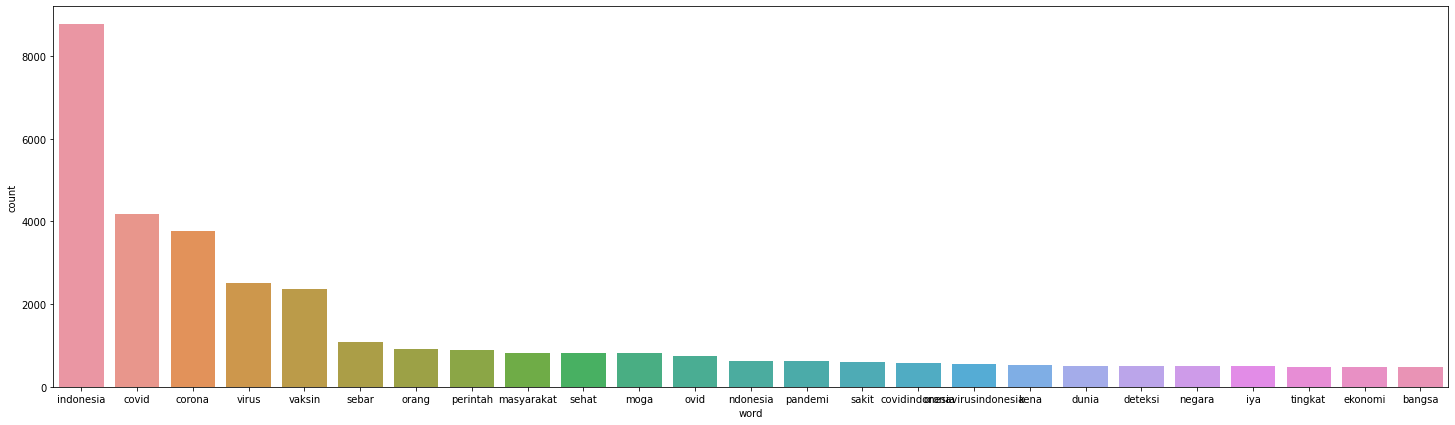

In [ ]:
freq_words(X,25)

In [ ]:
# TF-IDF

vectorizer = TfidfVectorizer(ngram_range=(1,2))
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

In [ ]:
print(train_vectors)

  (0, 11818)	0.2334646165139048
  (0, 8442)	0.2334646165139048
  (0, 5883)	0.15927564041507553
  (0, 37829)	0.13720788235744744
  (0, 26048)	0.21549806498561602
  (0, 33661)	0.2334646165139048
  (0, 1551)	0.2334646165139048
  (0, 36456)	0.2334646165139048
  (0, 1927)	0.2334646165139048
  (0, 36462)	0.2334646165139048
  (0, 36219)	0.2334646165139048
  (0, 20457)	0.2334646165139048
  (0, 28792)	0.2334646165139048
  (0, 12472)	0.03243315535943702
  (0, 11816)	0.2229548576025815
  (0, 8400)	0.1002672883155316
  (0, 5731)	0.048443944749439825
  (0, 37799)	0.06442937543127619
  (0, 26038)	0.173781024223841
  (0, 33659)	0.20971412728041844
  (0, 1524)	0.1539399027207013
  (0, 36455)	0.2334646165139048
  (0, 1908)	0.1615984104007499
  (0, 36459)	0.16698047564059668
  (0, 36212)	0.18702175454600406
  :	:
  (6001, 10854)	0.08744768540259562
  (6001, 11252)	0.08744768540259562
  (6001, 37316)	0.0484528155813743
  (6001, 5201)	0.03954436706065964
  (6001, 27766)	0.08166273339267575
  (6001, 5731)	

In [ ]:
print(test_vectors)

  (0, 35597)	0.29124762650988684
  (0, 34156)	0.249376947773484
  (0, 34109)	0.1537399813681105
  (0, 31461)	0.3242319261725038
  (0, 31401)	0.12290251827081108
  (0, 30738)	0.173414262425924
  (0, 25923)	0.21823908541936332
  (0, 25884)	0.13478752366577448
  (0, 20531)	0.23054125188410518
  (0, 20092)	0.3242319261725038
  (0, 19202)	0.17837724900746169
  (0, 16472)	0.1989155147871114
  (0, 14473)	0.21823908541936332
  (0, 14444)	0.15358244223100675
  (0, 13219)	0.2992802667061638
  (0, 12472)	0.045042647537195515
  (0, 8728)	0.2846844815875909
  (0, 4711)	0.3242319261725038
  (0, 3139)	0.18602072178775983
  (1, 35525)	0.19067402776596828
  (1, 35490)	0.09804987298096002
  (1, 34152)	0.16194265748435827
  (1, 34122)	0.174777111266081
  (1, 34109)	0.19589812451553
  (1, 33602)	0.1972718442363261
  :	:
  (2573, 34287)	0.18332293358249827
  (2573, 33808)	0.22195037999735487
  (2573, 33807)	0.20701068460576116
  (2573, 32303)	0.21112594412966165
  (2573, 32302)	0.21112594412966165
  (2573,

In [ ]:
occ = np.asarray(train_vectors.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurences': occ})
counts_df.sort_values(by= 'occurences', ascending = False)

,term,occurences
12472,indonesia,265.830671
5201,corona,180.163527
5731,covid,163.659728
37799,virus,142.932306
37316,vaksin,117.297640
...,...,...
17745,korona usaha,0.117500
75,acara kumpul,0.117500
35346,tim sukses,0.117500
15750,kali yaa,0.117500


In [ ]:
occ = np.asarray(test_vectors.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurences': occ})
counts_df.sort_values(by= 'occurences', ascending = False)

,term,occurences
12472,indonesia,124.077894
5201,corona,78.360066
5731,covid,77.473698
37799,virus,61.736861
37316,vaksin,53.924334
...,...,...
9118,ending sungguh,0.000000
9127,energi,0.000000
23005,ndonesiaraya indonesiacovid,0.000000
23004,ndonesiaraya,0.000000


# **SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
%%time
clf = SVC(kernel='linear', gamma=0.1, C=1.0)
clf.fit(train_vectors, Y_train)

pred = clf.predict(test_vectors) # predict data test

CPU times: user 8.04 s, sys: 56 ms, total: 8.1 s
Wall time: 8.09 s


Accuracy score is: 87.56798756798757

Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.77      0.83       500
     neutral       0.89      0.84      0.86       756
    positive       0.86      0.94      0.90      1318

    accuracy                           0.88      2574
   macro avg       0.89      0.85      0.86      2574
weighted avg       0.88      0.88      0.87      2574


Confusion Matrix:


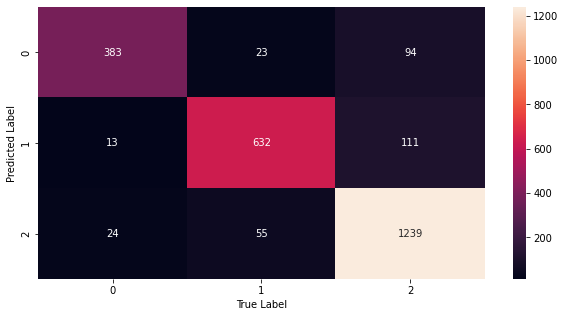

In [ ]:
import seaborn as sns

accuracy = accuracy_score(Y_test, pred) * 100
# print("Accuracy score is {}%.".format(round(accuracy),1))
print("Accuracy score is:",accuracy)
print()
print("Classification Report:")
print(classification_report(Y_test, pred))
print()

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(Y_test, pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# **GRIDSEARCHCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = clf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(train_vectors, Y_train)

In [ ]:
grid_search.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

## SVM After Tuning

In [ ]:
%%time
clf = SVC(kernel='rbf', gamma=0.1, C=100)
clf.fit(train_vectors, Y_train)

pred = clf.predict(test_vectors) # predict data test

CPU times: user 9.21 s, sys: 35.5 ms, total: 9.24 s
Wall time: 11.8 s


Accuracy score is: 88.38383838383838

Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.80      0.85       500
     neutral       0.89      0.84      0.87       756
    positive       0.87      0.94      0.90      1318

    accuracy                           0.88      2574
   macro avg       0.89      0.86      0.87      2574
weighted avg       0.89      0.88      0.88      2574


Confusion Matrix:


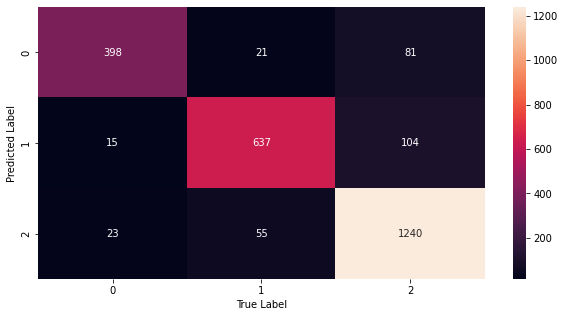

In [ ]:
import seaborn as sns

accuracy = accuracy_score(Y_test, pred) * 100
# print("Accuracy score is {}%.".format(round(accuracy),1))
print("Accuracy score is:",accuracy)
print()
print("Classification Report:")
print(classification_report(Y_test, pred))
print()

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(Y_test, pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# **LDA**

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(df['Isi_stopword'])
# Create Corpus
texts = df['Isi_stopword']
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2)]


In [ ]:
import gensim
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

[(0,
  '0.091*"indonesia" + 0.043*"corona" + 0.025*"covid" + 0.015*"normal" + '
  '0.012*"buka" + 0.010*"virus" + 0.009*"deteksi" + 0.009*"status" + '
  '0.008*"vaksin" + 0.008*"orang"'),
 (1,
  '0.062*"indonesia" + 0.048*"covid" + 0.019*"ovid" + 0.016*"ndonesia" + '
  '0.009*"orang" + 0.008*"psbb" + 0.008*"vaksin" + 0.007*"dunia" + '
  '0.007*"perintah" + 0.007*"rakyat"'),
 (2,
  '0.089*"indonesia" + 0.021*"ndonesia" + 0.020*"covid" + 0.016*"jakarta" + '
  '0.014*"tingkat" + 0.013*"sehat" + 0.012*"orang" + 0.011*"daerah" + '
  '0.011*"iya" + 0.011*"masyarakat"'),
 (3,
  '0.062*"indonesia" + 0.026*"covid" + 0.016*"sakit" + 0.013*"sebar" + '
  '0.013*"ekonomi" + 0.011*"rumah" + 0.010*"angka" + 0.010*"tinggal" + '
  '0.009*"sembuh" + 0.008*"coronavirus"'),
 (4,
  '0.046*"indonesia" + 0.030*"covid" + 0.020*"corona" + 0.019*"singapore" + '
  '0.017*"vaksin" + 0.015*"allah" + 0.015*"virus" + 0.014*"malaysia" + '
  '0.012*"jokowi" + 0.011*"moga"'),
 (5,
  '0.056*"indonesia" + 0.027*"covid" +

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle
import os
# Visualize the topics
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.090671 -0.042283       1        1  17.425699
7      0.060501 -0.055903       2        1  13.748079
0      0.113849 -0.011511       3        1  13.191030
3      0.047753 -0.019299       4        1  10.375836
2      0.065365  0.051150       5        1  10.105485
4      0.032038 -0.036956       6        1   8.947576
1      0.005838  0.040616       7        1   8.638232
5     -0.049494  0.015950       8        1   7.018832
9     -0.239093 -0.136678       9        1   6.433786
6     -0.127428  0.194914      10        1   4.115444, topic_info=            Term         Freq        Total Category  logprob  loglift
447     ndonesia   868.000000   868.000000  Default  30.0000  30.0000
2270   singapore   217.000000   217.000000  Default  29.0000  29.0000
25     indonesia  7917.000000  7917.000000  Default  28.0000  28.0000
196       corona  2654.000000  2654.000000  Default  27.0000  27.0000
248   masyarakat   742.000000   742.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
1111     selamat    24.036873   190.948489  Topic10  -5.3787   1.1180
285         laku    25.092303   275.581519  Topic10  -5.3357   0.7941
29         sehat    30.379270   812.426344  Topic10  -5.1445  -0.0958
157     perintah    26.995788   951.400384  Topic10  -5.2626  -0.3718
160       tangan    21.900395   346.687088  Topic10  -5.4717   0.4285

[734 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
9371      8  0.902162  aamiiiinnnnn
487       1  0.009968        aamiin
487       2  0.049842        aamiin
487       3  0.099683        aamiin
487       4  0.059810        aamiin
...     ...       ...           ...
2767      4  0.977539        wisata
2523      1  0.041236           wni
2523      3  0.948423           wni
9521      9  0.803324      wongwong
921       7  0.834342         zalim

[2239 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 8, 1, 4, 3, 5, 2, 6, 10, 7])